[1.64350288e-06 1.39104745e+00 1.45789024e+00 ... 3.53521325e+00
 3.51546296e+00 3.52561237e+00]


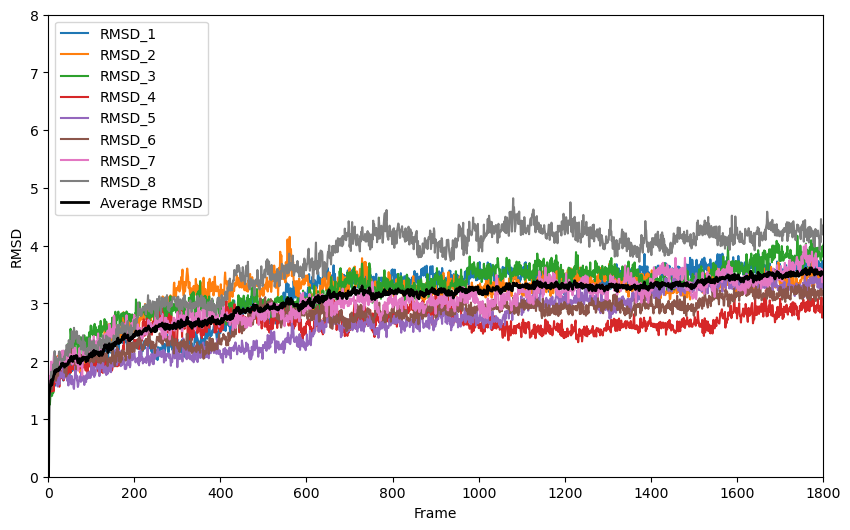

In [22]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 加载拓扑和轨迹文件
topology = 'step7_6v01_align.pdb'
trajectories = ['step7_binding_2.xtc', 'step7_binding_3.xtc', 'step7_binding_4.xtc', 'step7_binding_5.xtc','step7_binding_6.xtc','step7_binding_7.xtc','step7_binding_8.xtc','step7_binding_9.xtc']
universe = mda.Universe(topology, trajectories)

# 选择BB原子
bb_atoms = universe.select_atoms('name BB')

# 初始化RMSD结果列表
rmsd_results = []

# 遍历每条轨迹并计算RMSD
for traj in trajectories:
    universe.load_new(traj)
    rmsd = RMSD(bb_atoms, bb_atoms, select='name BB', ref_frame=0).run()
    rmsd_results.append(rmsd.rmsd[:, 2])  # 只ls存储RMSD值

# 计算平均RMSD
rmsd_results = np.array(rmsd_results).T  # 转置以便按帧计算平均值
avg_rmsd = np.mean(rmsd_results, axis=1)
frame_numbers = range(len(avg_rmsd))
print(avg_rmsd)


# 创建DataFrame以便于导出到CSV
df = pd.DataFrame(rmsd_results, columns=['RMSD_1','RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5','RMSD_6','RMSD_7','RMSD_8'])
df['Average_RMSD'] = avg_rmsd  # 添加平均RMSD列
df['Frame'] = np.arange(len(avg_rmsd)) + 1  # 假设帧数MSD_8','Average_RMS从1开始
df = df[['Frame','RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5', 'RMSD_6','RMSD_7','RMSD_8','Average_RMSD']]  # 重新排列列的顺序
df.to_csv('BB_RMSD.csv', index=False)


# 绘制折线图
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # 不包括帧数列和平均列
    plt.plot(df['Frame'], df[column], label=column)
plt.plot(df['Frame'], df['Average_RMSD'], label='Average RMSD', linewidth=2, color='black')
plt.xlabel('Frame')
plt.ylim(0,8)
plt.xlim(0,1800)
plt.ylabel('RMSD')
plt.legend()
plt.savefig('BB_RMSD_plot.png',dpi=600)
plt.show()


/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWar

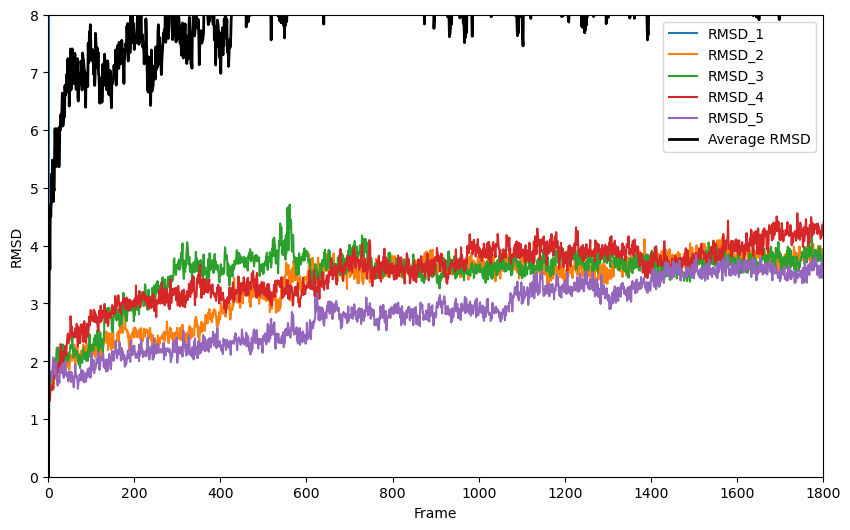

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

topology = 'down.pdb'
trajectories = ['down_1.xtc', 'down_2.xtc', 'down_3.xtc', 'down_4.xtc', 'down_6.xtc']
universe = mda.Universe(topology, trajectories)
# 选择S1-S4 BB原子
S1S4_atoms = universe.select_atoms("(resid 1:140) and (name BB)")

# 初始化RMSD结果列表
rmsd_results = []

# 遍历每条轨迹并计算RMSD
for traj in trajectories:
    universe.load_new(traj)
    rmsd = RMSD(S1S4_atoms, S1S4_atoms, select='(resid 1:140) and (name BB)', ref_frame=0).run()
    rmsd_results.append(rmsd.rmsd[:, 2])  # 只存储RMSD值

# 计算平均RMSD
rmsd_results = np.array(rmsd_results).T  # 转置以便按帧计算平均值
avg_rmsd = np.mean(rmsd_results, axis=1)
frame_numbers = range(len(avg_rmsd))


# 创建DataFrame以便于导出到CSV
df = pd.DataFrame(rmsd_results, columns=['RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5'])
df['Average_RMSD'] = avg_rmsd  # 添加平均RMSD列
df['Frame'] = np.arange(len(avg_rmsd)) + 1  # 假设帧数从1开始
df = df[['Frame', 'RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5', 'Average_RMSD']]  # 重新排列列的顺序
df.to_csv('S1S4_RMSD.csv', index=False)


# 绘制折线图
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # 不包括帧数列和平均列
    plt.plot(df['Frame'], df[column], label=column)
plt.plot(df['Frame'], df['Average_RMSD'], label='Average RMSD', linewidth=2, color='black')
plt.xlabel('Frame')
plt.ylabel('RMSD')
plt.xlim(0,1800)
plt.ylim(0,8)
plt.legend()
plt.savefig('BB_RMSD_plot.png',dpi=600)
plt.show()

/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWar

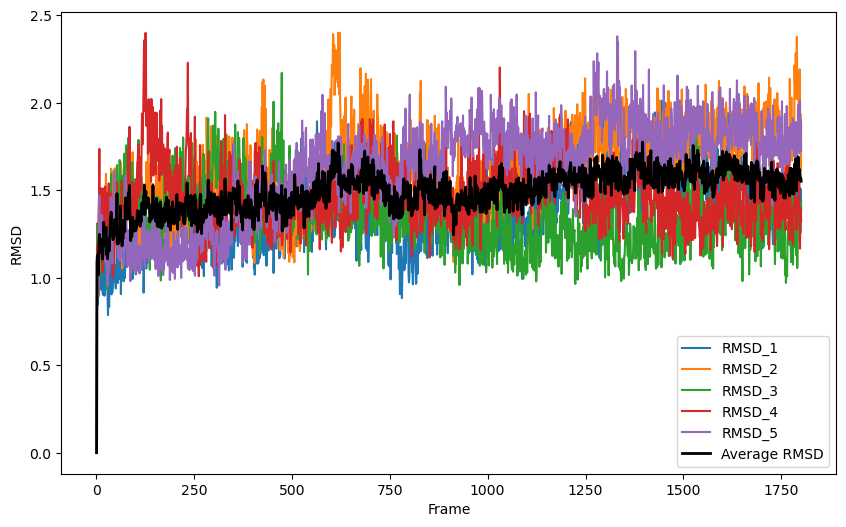

In [5]:

topology = 'down.pdb'
trajectories = ['step7_binding_1.xtc', 'down_2.xtc', 'down_3.xtc', 'down_4.xtc', 'down_6.xtc']
universe = mda.Universe(topology, trajectories)
# 选择S1-S4 BB原子
S45linker_atoms = universe.select_atoms("(resid 141:155) and (name BB)")
1
# 初始化RMSD结果列表
rmsd_results = []

# 遍历每条轨迹并计算RMSD
for traj in trajectories:
    universe.load_new(traj)
    rmsd = RMSD(S45linker_atoms, S45linker_atoms, select='(resid 141:155) and (name BB)', ref_frame=0).run()
    rmsd_results.append(rmsd.rmsd[:, 2])  # 只存储RMSD值

# 计算平均RMSD
rmsd_results = np.array(rmsd_results).T  # 转置以便按帧计算平均值
avg_rmsd = np.mean(rmsd_results, axis=1)
frame_numbers = range(len(avg_rmsd))


# 创建DataFrame以便于导出到CSV
df = pd.DataFrame(rmsd_results, columns=['RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5'])
df['Average_RMSD'] = avg_rmsd  # 添加平均RMSD列
df['Frame'] = np.arange(len(avg_rmsd)) + 1  # 假设帧数从1开始
df = df[['Frame', 'RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5', 'Average_RMSD']]  # 重新排列列的顺序
df.to_csv('S45linker_RMSD.csv', index=False)


# 绘制折线图
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # 不包括帧数列和平均列
    plt.plot(df['Frame'], df[column], label=column)
plt.plot(df['Frame'], df['Average_RMSD'], label='Average RMSD', linewidth=2, color='black')
plt.xlabel('Frame')
plt.ylabel('RMSD')
plt.legend()
plt.savefig('S45linker_RMSD_plot.png')
plt.show()

/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/mpudgx202301/miniconda3/envs/lingling/lib/python3.7/site-packages/MDAnalysis/analysis/rms.py:710: DeprecationWar

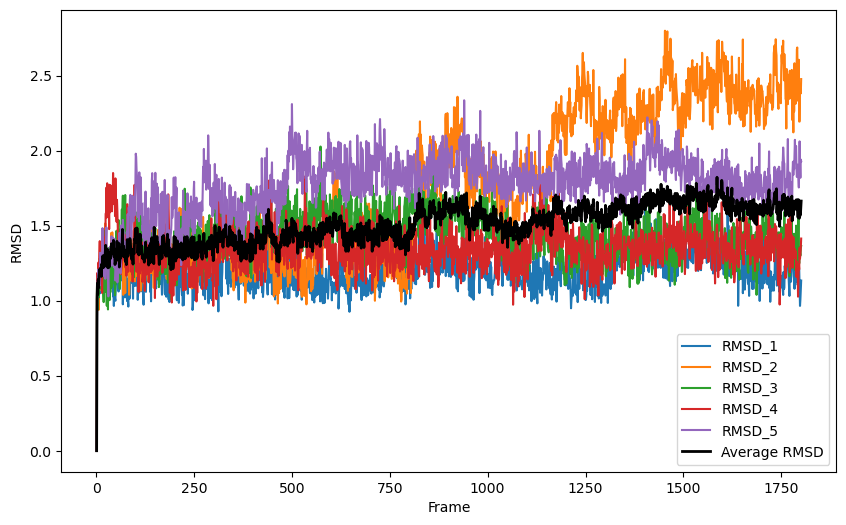

In [7]:

topology = 'down.pdb'
trajectories = ['down_1.xtc', 'down_2.xtc', 'down_3.xtc', 'down_4.xtc', 'down_5.xtc']
universe = mda.Universe(topology, trajectories)
# 选择S1-S4 BB原子
S5_S6_atoms = universe.select_atoms("(resid 156:250) and (name BB)")

# 初始化RMSD结果列表
rmsd_results = []

# 遍历每条轨迹并计算RMSD
for traj in trajectories:
    universe.load_new(traj)
    rmsd = RMSD(S5_S6_atoms, S5_S6_atoms, select='(resid 156:250) and (name BB)', ref_frame=0).run()
    rmsd_results.append(rmsd.rmsd[:, 2])  # 只存储RMSD值

# 计算平均RMSD
rmsd_results = np.array(rmsd_results).T  # 转置以便按帧计算平均值
avg_rmsd = np.mean(rmsd_results, axis=1)
frame_numbers = range(len(avg_rmsd))


# 创建DataFrame以便于导出到CSV
df = pd.DataFrame(rmsd_results, columns=['RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5'])
df['Average_RMSD'] = avg_rmsd  # 添加平均RMSD列
df['Frame'] = np.arange(len(avg_rmsd)) + 1  # 假设帧数从1开始
df = df[['Frame', 'RMSD_1', 'RMSD_2', 'RMSD_3', 'RMSD_4', 'RMSD_5', 'Average_RMSD']]  # 重新排列列的顺序
df.to_csv('S5_S6_RMSD.csv', index=False)


# 绘制折线图
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # 不包括帧数列和平均列
    plt.plot(df['Frame'], df[column], label=column)
plt.plot(df['Frame'], df['Average_RMSD'], label='Average RMSD', linewidth=2, color='black')
plt.xlabel('Frame')
plt.ylabel('RMSD')
plt.legend()
plt.savefig('S5_S6_RMSD_plot.png')
plt.show()